In [1]:
import pandas as pd
import os
import json
import glob
import numpy as np
import doctest
import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoSeries
from shapely.geometry import Polygon
import sys
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append('../src')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from clean import *

## Table of Contents 

- [Introduction](#heading)

- [Historcal Content](#heading-1)
  * [Sub-heading](#sub-heading-1)
    + [Sub-sub-heading](#sub-sub-heading-1)
- [Heading](#heading-2)
  * [Sub-heading](#sub-heading-2)
    + [Sub-sub-heading](#sub-sub-heading-2)
- [Heading](#heading-1)
  * [Sub-heading](#sub-heading-1)
    + [Sub-sub-heading](#sub-sub-heading-1)
- [Heading](#heading-2)
  * [Sub-heading](#sub-heading-2)
    + [Sub-sub-heading](#sub-sub-heading-2)    
- [Heading](#heading-1)
  * [Sub-heading](#sub-heading-1)
    + [Sub-sub-heading](#sub-sub-heading-1)
- [Heading](#heading-2)
  * [Sub-heading](#sub-heading-2)
    + [Sub-sub-heading](#sub-sub-heading-2)
- [Heading](#heading-1)
  * [Sub-heading](#sub-heading-1)
    + [Sub-sub-heading](#sub-sub-heading-1)
- [Heading](#heading-2)
  * [Sub-heading](#sub-heading-2)
    + [Sub-sub-heading](#sub-sub-heading-2)    

## Introduction

In almost every aspect of life, the power of unconscious and subconscious biases exists to aid in shaping everyday decisions. Often times, people tend to remember the negative or unfavorable portrayal of different groups whether they be ethnic, gendered, or political. Studies have proved that minorities have received unfavorable and disadvantaged outcomes when it comes to criminal justice including racial profiling of drivers. Humans rely on the police to protect the public from harm while promoting fairness, equality and justice in communities. In recent years however, racial profiling has led the public to live in fear as it defamed many minority communities into becoming “suspects” based of off their physical appearances, their backgrounds, cultures and religions. Due to this, many cities including San Diego have seen an increase in tensions between the city’s police forces and its residents.

As one of the safest cities in California, San Diego is the eighth largest city in the United States and one of the most diverse places to live. Due to the diversity of this population and increase tension in the population, this project aims to calculate whether the racial disparity in police traffic stop data in the city of San Diego is significant or nonexistent.

## Historical Context

Previously, SDSU conducted a similar analysis that consisted of “259,569 traffic stops initiated by San Diego Police Department (SDPD) officers between January 1, 2014 and December 31, 2015” (Chanin, ii). They focused on the reasoning for initiating a traffic stop, whether a citation was issued, whether a field interview was conducted, whether a search was initiated, whether contraband was found and whether an arrest was made. Unsurprisingly, this study found disparities between White and Black drivers in 2014 and found that while Black and Hispanic drivers had higher rates of being searched after a traffic stop was initiated, they had lower rates than White drivers of being found with contraband (Chanin, ii). Some inherent shortcomings during the SDSU analysis were the shortage of officers in the San Diego area, the lack of diversity among the officers compared to the actual city population and the disproportionate quantity of officers patrolling certain areas with respect to the crime rates. 

While the data collection from 2018 onwards has years of experience of the officer, no data collection has the race or ethnicity of the officer themselves. The SDSU data also lacks information about the specific geo-location of the stops and searches, what was seized, the vehicle information or demeanors of the passengers/drivers of the cars. They also omitted traffic stops that “occurred as a result of a suspect description, code enforcement effort, or other type of call for service” (Chanin, iii). Thus, they limited their data sample to consist of stops that discretionary decisions like moving violations or things like a broken tail light. Another technique used for the SDSU analysis was an approach on the ‘Veil of Darkness’. This technique is based off of the assumption that bias over the race or ethnicity of a driver will be more visible in the daylight then stops conducted when it is dark outside as the night makes it harder to detect physical appearance. The SDSU study’s approach was to use the ‘inner-twilight period’ which took into consideration the seasonal time changes between summer and winter. Similar to the SDSU study, a previous study on SDPD traffic stop data was done in 2000 and 2001. This previous study caused the validity of the vehicle stop data to be questioned as the vehicle stop forms were not being filled out regularly. Another inconsistency is that 19% of the traffic stop records submitted possessed as least one missing data piece (Chanin, 15). 


## Data

#### Introduction to Data 

 In order to get a better idea, data from between January 1, 2014 – December 31, 2019 will be used. This data consists of why the driver was stopped, whether there was a citation or warning issued, whether a field interview was conducted, whether a search was initiated, whether property was seized, whether contraband was discovered and whether an arrest occurred along with the area code and time/length of stop. Below is a table of the columns used for the following analysis.

| Columns   |     Description      | 
|----------|:-------------:|
| Stop ID |  The unique identifier for each stop and post-stop outcomes. | 
|  Stop Cause |    Reason for the stop.   |  
| Date Stop | Month, day and year of the stop. |
| Time Stop | Time of day of the stop. |
| Subject Race  | Race of the driver Stopped. |
| Subject Sex | Sex of the driver. |
| Subject Age | Age of the driver. |
| Service Area | Service area where the stop occured. |
| San Diego Resident | Whether the driver is a resident of San Diego or not. |
| Property Seized | Whether property was seized from the driver. |
| Searched | Whether driver was searched or not. |
| Arrested | Whether driver was arrested or not. |
| Obtained Consent | Whether the officer obtained consent or not. |
| Contraband Found | Whether the officer found contraband or not. |
| Year | Year of stop. |

#### Data Generation Process 

### EDA

Text(0.5,1,'Amount of Drivers Stopped Across the Driver Age')

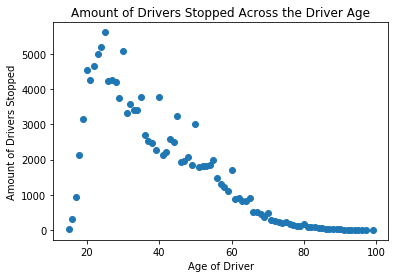

In [5]:
age = allyears[allyears['year'] == 2014]
age = age.sort_values(by = 'subject_age').dropna()
age = age[age.subject_age > 14]
age = age[age.subject_age <= 110]
gage = pd.DataFrame(age.groupby('subject_age')['stop_id'].count())
plt.scatter(x = gage.index, y= gage['stop_id'])
plt.xlabel ('Age of Driver')
plt.ylabel ('Amount of Drivers Stopped')
plt.title ('Amount of Drivers Stopped Across the Driver Age')

### Reliability of Data

#### Precision 

The dataset consisted of many unprecise rows and columns of data. For example, the data from the years 2018 and onwards consisted of less granular subject races as compared to the data from 2014-2017. The pre2018 dataset splits the races into precise races like 'Laotian' and 'Vietnamese' where as the post2018 dataset combines those into the 'Asian' race. This means that a little more than 22,000 rows of data (1/3 of the dataset) had to be reassigned to more generic ones like 'Asian' and 'Middle Eastern'. 

Another example of where data is not precise is when the post2018 dataset was more exact in allocating gender to the stopped subjects whereas pre2018 only had 'M' for Males or 'F' for Females or 'X' for Unknown for those they had no idea about.

In [6]:
owd = os.getcwd()
os.chdir("../data/raw")

In [7]:
fifteen = pd.concat([pd.read_csv(f) for f in newnames]).reset_index(drop = True).subject_race.value_counts()
pd.DataFrame(fifteen)

,subject_race
W,196665
H,141695
B,51754
O,35395
A,21695
F,6213
V,3348
C,2450
I,2280
X,713


In [8]:
pd.DataFrame(post2018.subject_race.value_counts())

,subject_race
White,103731
Hispanic/Latino/a,69465
Black/African American,46522
Asian,12189
Middle Eastern or South Asian,6796
Pacific Islander,2075
Native American,512


In [9]:
newtableee = pd.DataFrame()
subValCnts = pd.DataFrame(allyears.subject_race.value_counts())
newtableee['Driver Race'] = subValCnts.index
newtableee['Number Of Stops'] = list(pd.DataFrame(allyears.subject_race.value_counts())['subject_race'])
newtableee['Percentage of Stops'] = list(pd.DataFrame(allyears.subject_race.value_counts()/allyears.subject_race.value_counts().sum())['subject_race'])
newtableee

,Driver Race,Number Of Stops,Percentage of Stops
0,White,300396,0.425585
1,Hispanic/Latino/a,211160,0.299160
2,Black/African American,98276,0.139232
3,Other,35395,0.050146
4,Middle Eastern or South Asian,31120,0.044089
5,Asian,25955,0.036772
6,Pacific Islander,3029,0.004291
7,Native American,512,0.000725


In [10]:
fifteengend = pd.concat([pd.read_csv(f) for f in newnames ]).reset_index(drop = True).subject_sex.value_counts()
pd.DataFrame(fifteengend)

,subject_sex
M,301139
F,163924
X,66


In [11]:
pd.DataFrame(post2018.subject_sex.value_counts())

,subject_sex
1,178441
2,62151
3,385
4,240
0,73


#### Missingness 

The dataset contained several rows of missing data, a problem that was significantly apparent among post-stop outcomes. Data charting the residence of the stop driver was absent from greater than 4 percent of the total stops recorded between 2014 and 2017. Data on officers searching drivers (around 18 percent), and making arrests (around 17 percent), were also missing in relatively high volume. The worst quality consisted of data associated with the discovery of contraband, the seizure of property and the officers obtainment of consent, where over 90 percent were either left blank or ambiguously labeled ‘null’.

In order to use the columns missing the data, I set the values equal to NaN as when computing the mean and other statistics, these rows would not be counter, but at the same time, if they were automatically set as '0', these values would be counted in the demominator. For a lot of the columns like property seized, searched, whether they are a San Diego resident, I assumed that missing values meant that it did not pertaint to the subject stopped so in this case. For columns like age, where the missing data was crucial but also guessable, I initially left the rows at NaN but went back and imputed the means per race so that I could construct the best possible analysis of the data. 

From the nulls, one can assume that the driver had their property seized and had contraband found by the officers only after they had provided consent or had been searched.

Text(0,0.5,'Percentage of Nulls')

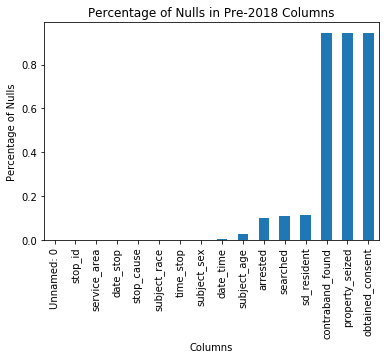

In [12]:
prn = pd.concat([pd.read_csv(f) for f in newnames]).reset_index(drop = True).isnull().mean().sort_values().plot(kind = 'bar', title = 'Percentage of Nulls in Pre-2018 Columns')
prn.set_xlabel("Columns")
prn.set_ylabel("Percentage of Nulls")

Text(0,0.5,'Percentage of Nulls')

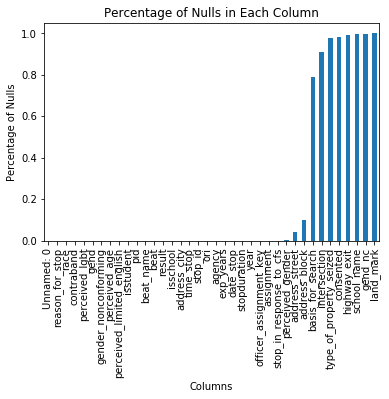

In [13]:
nulls = pt2018.isnull().mean().sort_values().plot(kind = 'bar', title = 'Percentage of Nulls in Each Column')
nulls.set_xlabel("Columns")
nulls.set_ylabel("Percentage of Nulls")

#### Accuracy 

Another factor we had to look for in the reliability of the data was age. This is an example of data that is very hard to make accurate as although legal ages for drivers exist, this data consists of not only ages that are too young to be legal but ones that are too old to be alive. In order to create the anaylsis, I made the assumption that ages below 14 would not drive and neither would those ages greater than 120. From this assumption, I decided to coerce and grab the ages between 14 - 120 while dropping everything else. From the graph, we can see that the lines are thicker and longer near integers the end in 5's and 0's. This maybe because of officers perceiving age in the post2018 dataset (also has to do with precision when officers perceived age to be closer to 'bin ages').

Another example of accuracy is the race codes in the datasets. These are accurate because the officers had to bubble in the race codes so they were not misspelled or written with capitals or lower case letters. 

The stop causes for pre2018 are inaccurate as there are many of the same meanings with different inputs such as 'NOTHING MARKED', 'NOT SPECIFIED', and 'NOT MARKED'. This in return makes the data harder and more inefficient to clean because you'd have to loop through all of the unique inputs and map it to one form. 

In [14]:
pd.DataFrame(pre2018.stop_cause.value_counts()).head(15)

,stop_cause
Moving Violation,344856
Equipment Violation,114205
Radio Call/Citizen Contact,2181
"Muni, County, H&S Code",1625
Personal Knowledge/Informant,1011
No Cause Specified on a Card,707
"Suspect Info (I.S., Bulletin, Log)",644
Personal Observ/Knowledge,254
"UNI, &County, H&&S Code",73
"MUNI, County, H&S Code",55


Text(0.5,1,'Age of Drivers')

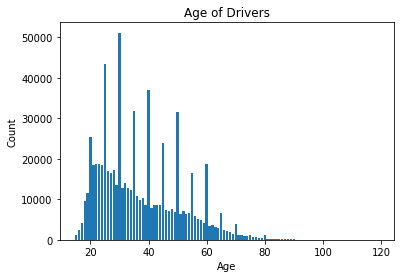

In [15]:
forgraphs = allyears
forgraphs = forgraphs[forgraphs['subject_age'] > 14]
forgraphs = forgraphs[forgraphs['subject_age'] < 120]
a = forgraphs.subject_age.value_counts().to_frame()
plt.bar(a.index, a.subject_age)
plt.xlabel ('Age')
plt.ylabel ('Count')
plt.title ('Age of Drivers')

### Approach to Cleaning 

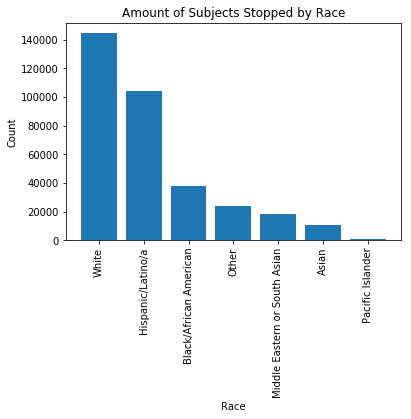

In [16]:
forgraphs = allyears.dropna()
r = forgraphs.subject_race.value_counts().to_frame()
plt.bar(r.index, r.subject_race)
plt.xlabel ('Race')
plt.ylabel ('Count')
plt.title ('Amount of Subjects Stopped by Race')
plt.xticks(rotation = 'vertical')
plt.show()

## Stop Rates

In order to get the stop rates, 

In [17]:
os.chdir(owd)
j = pd.read_csv('../data/uploaded/joined.csv')
jdf = pd.DataFrame(j.groupby('serv')['H7X001'].sum())
totdf = pd.DataFrame(allyears.groupby('service_area')['subject_race'].count())
combo = jdf.join(totdf, how = 'outer')
combo['percentage'] = combo['subject_race']/combo['H7X001']
combo = combo.rename(columns={"H7X001": "Population", "subject_race": "Number of Stops", "percentage": "% of Stops/Population"})
combo

,Population,Number of Stops,% of Stops/Population
0.0,0.0,NaN,NaN
110.0,127318.0,42407.0,0.333079
120.0,89063.0,63901.0,0.717481
130.0,NaN,253.0,NaN
230.0,109952.0,28068.0,0.255275
240.0,108664.0,37281.0,0.343085
310.0,66967.0,55223.0,0.824630
320.0,74494.0,27935.0,0.374997
430.0,114663.0,28251.0,0.246383
440.0,50764.0,26681.0,0.525589


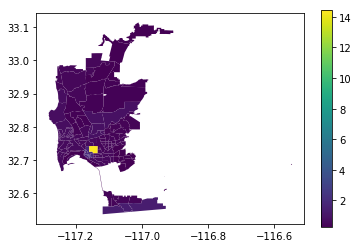

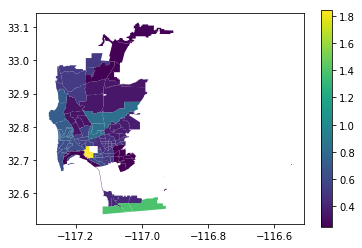

In [18]:
beat_url = 'http://seshat.datasd.org/sde/pd/pd_beats_datasd.geojson'
pol = gpd.read_file(beat_url)
cp = pol.copy()
cp =cp.join(combo, on = 'serv')
cp.plot(column='% of Stops/Population', legend = True)
cp2 = cp[cp['serv'] != 530]
gp = cp2.plot(column='% of Stops/Population', legend= True)

In [19]:
totpopcens = pd.pivot_table(censusyr(j), index= ['serv'], aggfunc=np.sum).drop(columns = ['beat', 'div']).drop(0)

In [20]:
data15 = allyears[allyears.year == 2015]

In [21]:
iht = yearcnt(data15)

In [22]:
stopratesbyarea = iht/totpopcens
pd.DataFrame(stopratesbyarea.mean()).dropna()

,0
Asian,0.022432
Black/African American,0.202371
Other,0.279779
Pacific Islander,0.067127
Total,0.097371
White,0.059204


In [23]:
pd.DataFrame(totpopcens.sum())

,0
Asian,207944
Black/African American,87949
Native American,7696
Other,227931
Pacific Islander,5908
Total,1307395
White,769967


## Post-Stop Outcomes

In [24]:
rc = allyears[allyears.subject_race != 'Native American']
rc = allyears[allyears.year == 2015]
rc = rc[rc.subject_race != 'Middle Eastern or South Asian']
rc = rc[rc.subject_race != 'Other']
#rc = rc[rc.subject_race != 'Pacific Islander']

In [25]:
poststop = pd.pivot_table(rc, index= ['subject_race'], aggfunc={
...                              'arrested':np.mean, 'property_seized': np.mean, 'searched':np.mean, 'contraband_found':np.mean, 'subject_race': 'count'})
poststop.T

subject_race,Asian,Black/African American,Hispanic/Latino/a,Pacific Islander,White
arrested,0.011022,0.017424,0.013064,0.016529,0.011126
contraband_found,0.002204,0.007018,0.003977,0.000000,0.002807
property_seized,0.002756,0.005969,0.006735,0.004132,0.002927
searched,0.034996,0.079858,0.050022,0.061983,0.025701
subject_race,3629.000000,12397.000000,34445.000000,242.000000,49881.000000


Text(0,0.5,'Mean Rates')

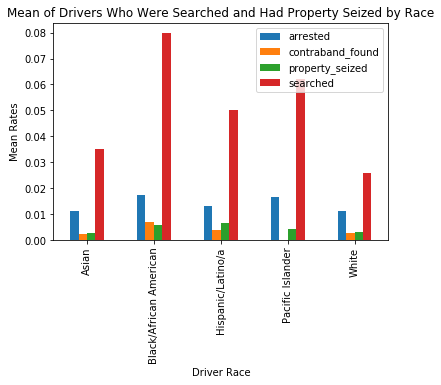

In [26]:
raceonly= pd.pivot_table(rc, index= ['subject_race'], aggfunc={
...                              'arrested':np.mean, 'property_seized': np.mean, 'searched':np.mean, 'contraband_found':np.mean})
ax = raceonly.plot(kind = 'bar', title='Mean of Drivers Who Were Searched and Had Property Seized by Race')#,color=['orange', 'red', 'green', 'blue'])
ax.set_xlabel("Driver Race")
ax.set_ylabel("Mean Rates")

In [27]:
rip = pd.pivot_table(allyears, index= ['year'], aggfunc={
...                              'arrested':np.mean, 'property_seized': np.mean, 'searched':np.mean, 'contraband_found':np.mean})
rip

,arrested,contraband_found,property_seized,searched
year,,,,
2014,0.014123,0.004245,0.005306,0.049541
2015,0.011662,0.003422,0.004245,0.037922
2016,0.012033,0.004677,0.005192,0.038544
2017,0.010289,0.004149,0.005348,0.043125
2018,0.153012,0.057266,0.019976,0.166971
2019,0.190029,0.073715,0.021238,0.219540


Text(0,0.5,'Percent of Post-Stop Outcomes')

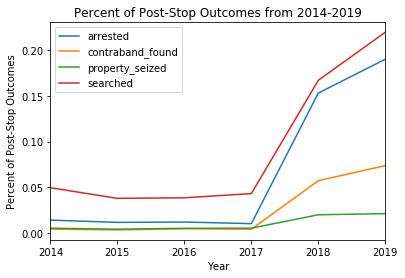

In [28]:
tr = rip.plot(title = 'Percent of Post-Stop Outcomes from 2014-2019')
tr.set_xlabel("Year")
tr.set_ylabel("Percent of Post-Stop Outcomes")

## Veil of Darkness

### Explanation 

For this section, we will do a replication of the inter-twilight analysis that was done in the SDSU study. The Veil of Darkness method aims to use data that is unbiased in terms of stop decisions. This method relies on the idea that the officers who were stopping individuals based on their races and skin colors would not affect the effect of post stop outcomes as it takes into consideration the amount of daylight and darkness outside. According to the study, "The naive approach is just to compare whether daytime stops or nighttime stops have higher proportion of black drivers". To adjust for the differences in the time of the sun setting throughout the year, we use the inter-twilight period which aims to focus on stops that occur within 5:09 PM and 8:29 PM. 

In [105]:
vod_df = get_VOD_df(allyears)

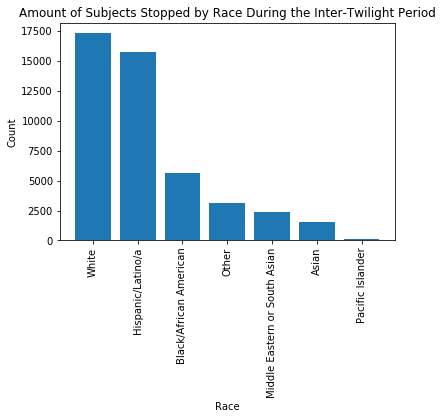

In [106]:
vodgraph = vod_df.dropna()
vcn = vodgraph.subject_race.value_counts().to_frame()
plt.bar(vcn.index, vcn.subject_race)
plt.xlabel ('Race')
plt.ylabel ('Count')
plt.title ('Amount of Subjects Stopped by Race During the Inter-Twilight Period')
plt.xticks(rotation = 'vertical')
plt.show()

In [107]:
aftervod = pd.pivot_table(vod_df, index= ['service_area', 'subject_race','subject_sex'], aggfunc={
...                              'property_seized': [np.mean, np.sum], 'searched':[np.mean, np.sum], 'subject_age':np.mean, 'stop_id': 'count'})

haha = aftervod.max(level=1)
haha

property_seized        searched        stop_id  \
                                         mean   sum      mean    sum   count   
subject_race                                                                   
Asian                                0.090909   4.0  0.350000   15.0     269   
Black/African American               0.032258   7.0  0.226730   98.0     604   
Hispanic/Latino/a                    0.076923  16.0  1.000000  116.0    3097   
Middle Eastern or South Asian        0.076923   1.0  0.133333   10.0     279   
Other                                0.076923   2.0  0.153846    6.0     369   
Pacific Islander                     0.000000   0.0  1.000000    3.0      11   
White                                0.024510  11.0  0.203704   66.0    1346   

                              subject_age  
                                     mean  
subject_race                               
Asian                            47.00000  
Black/African American           41.26506  
Hispanic/Latino/a                49.00000  
Middle Eastern or South Asian    60.00000  
Other                            41.00000  
Pacific Islander                 57.00000  
White                            48.00000

In [111]:
getinter = pd.read_csv('../data/forVoD.csv')
getinter = getinter.drop(columns = ['Day', 'Age of Moon', 'Rise', 'Culm'])
getinter = getinter[:12]
getinter = getinter.set_index('Month', drop = True)
getinter['Set'] = pd.to_datetime(getinter['Set'], format= '%H:%M', errors='coerce')
dicvd = getinter['Set'].to_dict()

In [112]:
def light_or_dark(df):
    lst = []
    for i in range(len(df)):
        if df.times[i] > df.time_stop[i]:
            lst.append('light')
        else:
            lst.append('dark')
    return lst

In [113]:
vod_df1 = vod_df.reset_index(drop=True)
getdays = []
for i in range(len(vod_df1.date_stop)):
    getdays.append(int(vod_df1.date_stop[i][5:7])) 
vod_df1['Month'] = getdays
vod_df1['times'] = vod_df1.Month.map(dicvd)
vod_df1['whatisit'] = light_or_dark(vod_df1)
vod_df1

,stop_id,stop_cause,date_stop,time_stop,subject_race,subject_sex,subject_age,service_area,sd_resident,property_seized,searched,arrested,obtained_consent,contraband_found,year,Month,times,whatisit
0,1045004,Moving Violation,2014-01-01,1900-01-01 17:15:00,Hispanic/Latino/a,1.0,50.0,720.0,0,0,0,0,0,0,2014,1,1900-01-01 18:18:00,light
1,1045005,Moving Violation,2014-01-01,1900-01-01 17:15:00,Hispanic/Latino/a,1.0,25.0,720.0,0,0,0,0,0,0,2014,1,1900-01-01 18:18:00,light
2,1044999,Moving Violation,2014-01-01,1900-01-01 17:15:00,White,1.0,18.0,240.0,1,0,0,0,0,0,2014,1,1900-01-01 18:18:00,light
3,1045001,Equipment Violation,2014-01-01,1900-01-01 17:29:00,White,1.0,49.0,230.0,1,0,0,0,0,0,2014,1,1900-01-01 18:18:00,light
4,1045003,Moving Violation,2014-01-01,1900-01-01 17:50:00,Black/African American,1.0,50.0,320.0,1,0,0,0,0,0,2014,1,1900-01-01 18:18:00,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47487,1444713,Moving Violation,2016-12-31,1900-01-01 19:30:00,Black/African American,2.0,25.0,610.0,0,0,0,0,0,0,2016,12,1900-01-01 18:10:00,dark
47488,1444732,Personal Knowledge/Informant,2016-12-31,1900-01-01 19:30:00,White,1.0,18.0,320.0,1,0,0,0,0,0,2016,12,1900-01-01 18:10:00,dark
47489,1444733,Moving Violation,2016-12-31,1900-01-01 19:30:00,Hispanic/Latino/a,1.0,42.0,NaN,0,0,0,0,0,0,2016,12,1900-01-01 18:10:00,dark
47490,1444736,Equipment Violation,2016-12-31,1900-01-01 19:45:00,Black/African American,1.0,17.0,820.0,1,0,0,0,0,0,2016,12,1900-01-01 18:10:00,dark


In [136]:
light = vod_df1[vod_df1.whatisit=='light']
light = pd.DataFrame(light.groupby('subject_race')['stop_id'].count() / len(light))

In [146]:
dark = vod_df1[vod_df1.whatisit=='dark']
dark = pd.DataFrame(dark.groupby('subject_race')['stop_id'].count() / len(dark))

stop_id              
whatisit                               dark         light
subject_race                                             
Asian                          1.245223e+06  1.247139e+06
Black/African American         1.254312e+06  1.252908e+06
Hispanic/Latino/a              1.255367e+06  1.250055e+06
Middle Eastern or South Asian  1.249871e+06  1.250916e+06
Other                          1.250439e+06  1.252616e+06
Pacific Islander               1.270307e+06  1.256377e+06
White                          1.251112e+06  1.250425e+06

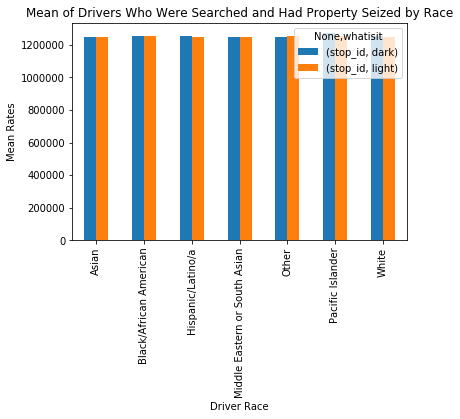

In [144]:
vod_df2 = vod_df1[vod_df1.year==2015]
racevod= pd.pivot_table(vod_df2, index= ['subject_race'], columns = 'whatisit', aggfunc={'stop_id':np.mean})
ax1 = racevod.plot(kind = 'bar', title='Mean of Drivers Who Were Searched and Had Property Seized by Race')#,color=['orange', 'red', 'green', 'blue'])
ax1.set_xlabel("Driver Race")
ax1.set_ylabel("Mean Rates")
racevod

#### Shortcomings

## Main Results

In [108]:
ret = get_VOD_df(allyears)
ret = ret[ret['year'] == 2014]
ret = ret.sort_values(by = 'time_stop')
ret['time_stop'] = [str(x.time()) for x in ret.time_stop]
ret['time_stop'] = [int(x[0:2]) * 3600 + int(x[3:5]) * 60 + int(x[6:]) for x in ret.time_stop]
forgraph = pd.DataFrame(ret.groupby('time_stop')['stop_id'].count())

In [109]:
fif = allyears[allyears['year'] == 2014]
fif = fif.sort_values(by = 'time_stop').dropna()
fif['time_stop'] = [str(x.time()) for x in fif.time_stop]
fif['time_stop'] = [int(x[0:2]) * 3600 + int(x[3:5]) * 60 + int(x[6:]) for x in fif.time_stop]
yttt = pd.DataFrame(fif.groupby('time_stop')['stop_id'].count())

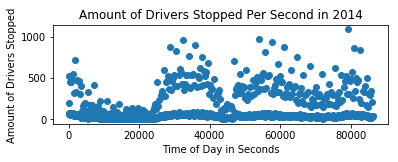

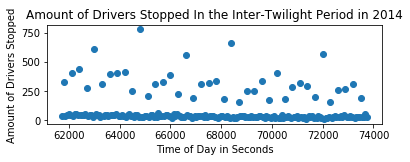

In [110]:
plt.subplot(2,1,1)
plt.scatter(x = yttt.index, y= yttt['stop_id'])
plt.xlabel ('Time of Day in Seconds')
plt.ylabel ('Amount of Drivers Stopped')
plt.title ('Amount of Drivers Stopped Per Second in 2014')
#plt.xticks(rotation = 'vertical')
plt.show()
plt.subplot(2, 1, 2)
plt.scatter(x = forgraph.index, y= forgraph['stop_id'])
plt.xlabel ('Time of Day in Seconds')
plt.ylabel ('Amount of Drivers Stopped')
plt.title ('Amount of Drivers Stopped In the Inter-Twilight Period in 2014')
#plt.xticks(rotation = 'vertical')
plt.show()

In [86]:
ageless40 = vod_df[vod_df.subject_age < 40]
ageless40

,stop_id,stop_cause,date_stop,time_stop,subject_race,subject_sex,subject_age,service_area,sd_resident,property_seized,searched,arrested,obtained_consent,contraband_found,year,Month
1,1045005,Moving Violation,2014-01-01,1900-01-01 17:15:00,Hispanic/Latino/a,1.0,25.0,720.0,0,0,0,0,0,0,2014,1
2,1044999,Moving Violation,2014-01-01,1900-01-01 17:15:00,White,1.0,18.0,240.0,1,0,0,0,0,0,2014,1
5,1045000,Moving Violation,2014-01-01,1900-01-01 17:50:00,White,2.0,21.0,320.0,1,0,0,0,0,0,2014,1
9,1045008,Equipment Violation,2014-01-01,1900-01-01 18:40:00,White,1.0,17.0,320.0,1,0,0,0,0,0,2014,1
10,1045010,Moving Violation,2014-01-01,1900-01-01 19:28:00,Middle Eastern or South Asian,2.0,23.0,110.0,1,0,0,0,0,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47486,1444712,Moving Violation,2016-12-31,1900-01-01 18:50:00,Hispanic/Latino/a,2.0,32.0,710.0,0,0,0,0,0,0,2016,31
47487,1444713,Moving Violation,2016-12-31,1900-01-01 19:30:00,Black/African American,2.0,25.0,610.0,0,0,0,0,0,0,2016,31
47488,1444732,Personal Knowledge/Informant,2016-12-31,1900-01-01 19:30:00,White,1.0,18.0,320.0,1,0,0,0,0,0,2016,31
47490,1444736,Equipment Violation,2016-12-31,1900-01-01 19:45:00,Black/African American,1.0,17.0,820.0,1,0,0,0,0,0,2016,31


In [37]:
less40 = pd.pivot_table(ageless40, index= ['subject_race'], aggfunc={
...                              'arrested':np.mean, 'property_seized': np.mean, 'searched':np.mean, 'contraband_found':np.mean}).head()


In [38]:
allages = pd.pivot_table(vod_df, index= ['subject_race'], aggfunc={
...                              'arrested':np.mean, 'property_seized': np.mean, 'searched':np.mean, 'contraband_found':np.mean}).head()



In [39]:
less40-allages

,arrested,contraband_found,property_seized,searched
subject_race,,,,
Asian,0.001662,0.002440,0.002270,0.012357
Black/African American,0.001941,0.001242,0.001325,0.014045
Hispanic/Latino/a,0.002170,0.000784,0.000583,0.011067
Middle Eastern or South Asian,0.000203,-0.000759,-0.000111,0.004257
Other,0.001866,0.000622,0.000466,0.003886


## Conclusion